In [1]:
print('Hello world')

Hello world


In [57]:
import os
print(os.getcwd())

C:\Users\dheer\Documents\Jupyternotebooks


In [58]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


In [65]:
humidity = pd.read_csv('humidity.csv',encoding = "utf-8")
print(humidity)
city=pd.read_csv('city_attributes.csv')
print(city)
pressure=pd.read_csv('pressure.csv')
print(pressure)
temperature=pd.read_csv('temperature.csv')
print(temperature)
description=pd.read_csv('weather_description.csv')
print(description)
windspeed=pd.read_csv('wind_speed.csv')
print(windspeed)

               datetime  Portland  San Francisco  Seattle  Los Angeles  \
0      01-10-2012 12:00       NaN            NaN      NaN          NaN   
1      01-10-2012 13:00      81.0           88.0     81.0         88.0   
2      01-10-2012 14:00      80.0           87.0     80.0         88.0   
3      01-10-2012 15:00      80.0           86.0     80.0         88.0   
4      01-10-2012 16:00      80.0           85.0     79.0         88.0   
...                 ...       ...            ...      ...          ...   
45248  29-11-2017 20:00      81.0            NaN     93.0         24.0   
45249  29-11-2017 21:00      71.0            NaN     87.0         21.0   
45250  29-11-2017 22:00      71.0            NaN     93.0         23.0   
45251  29-11-2017 23:00      71.0            NaN     87.0         14.0   
45252  30-11-2017 00:00      76.0            NaN     75.0         56.0   

       San Diego  Las Vegas  Phoenix  Albuquerque  
0            NaN        NaN      NaN          NaN  
1      

In [66]:
portland=(humidity[['datetime','Portland']].merge(temperature[['datetime','Portland']],on='datetime').merge(pressure[['datetime','Portland']], on='datetime').merge(windspeed[['datetime','Portland']], on='datetime').merge(description[['datetime','Portland']], on='datetime'))

portland.columns=['datetime','humidity','temperature','pressure','windspeed','description']
print(portland)

               datetime  humidity  temperature  pressure  windspeed  \
0      01-10-2012 12:00       NaN          NaN       NaN        NaN   
1      01-10-2012 13:00      81.0     8.930000    1024.0        0.0   
2      01-10-2012 14:00      80.0     8.933252    1024.0        0.0   
3      01-10-2012 15:00      80.0     8.941866    1024.0        0.0   
4      01-10-2012 16:00      80.0     8.950481    1024.0        0.0   
...                 ...       ...          ...       ...        ...   
45248  29-11-2017 20:00      81.0     8.850000    1031.0        2.0   
45249  29-11-2017 21:00      71.0     9.740000    1030.0        1.0   
45250  29-11-2017 22:00      71.0    10.240000    1030.0        1.0   
45251  29-11-2017 23:00      71.0     9.870000    1029.0        2.0   
45252  30-11-2017 00:00      76.0     9.130000    1029.0        1.0   

            description  
0                   NaN  
1      scattered clouds  
2      scattered clouds  
3      scattered clouds  
4      scattered 

In [67]:
import datetime
portland['datetime']=pd.to_datetime(portland['datetime'])
portland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     45253 non-null  datetime64[ns]
 1   humidity     44804 non-null  float64       
 2   temperature  45252 non-null  float64       
 3   pressure     45249 non-null  float64       
 4   windspeed    45252 non-null  float64       
 5   description  45252 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.4+ MB


In [68]:
portland.isnull().sum()

datetime         0
humidity       449
temperature      1
pressure         4
windspeed        1
description      1
dtype: int64

In [70]:
portland['humidity']=portland['humidity'].fillna(method='bfill')
portland['temperature']=portland['temperature'].fillna(method='bfill')
portland['pressure']=portland['pressure'].fillna(method='bfill')
portland['windspeed']=portland['windspeed'].fillna(method='bfill')
portland['description']=portland['description'].fillna(method='bfill')

In [71]:
portland.isnull().sum()

datetime       0
humidity       0
temperature    0
pressure       0
windspeed      0
description    0
dtype: int64

In [72]:
print(portland)

                 datetime  humidity  temperature  pressure  windspeed  \
0     2012-01-10 12:00:00      81.0     8.930000    1024.0        0.0   
1     2012-01-10 13:00:00      81.0     8.930000    1024.0        0.0   
2     2012-01-10 14:00:00      80.0     8.933252    1024.0        0.0   
3     2012-01-10 15:00:00      80.0     8.941866    1024.0        0.0   
4     2012-01-10 16:00:00      80.0     8.950481    1024.0        0.0   
...                   ...       ...          ...       ...        ...   
45248 2017-11-29 20:00:00      81.0     8.850000    1031.0        2.0   
45249 2017-11-29 21:00:00      71.0     9.740000    1030.0        1.0   
45250 2017-11-29 22:00:00      71.0    10.240000    1030.0        1.0   
45251 2017-11-29 23:00:00      71.0     9.870000    1029.0        2.0   
45252 2017-11-30 00:00:00      76.0     9.130000    1029.0        1.0   

            description  
0      scattered clouds  
1      scattered clouds  
2      scattered clouds  
3      scattered cl

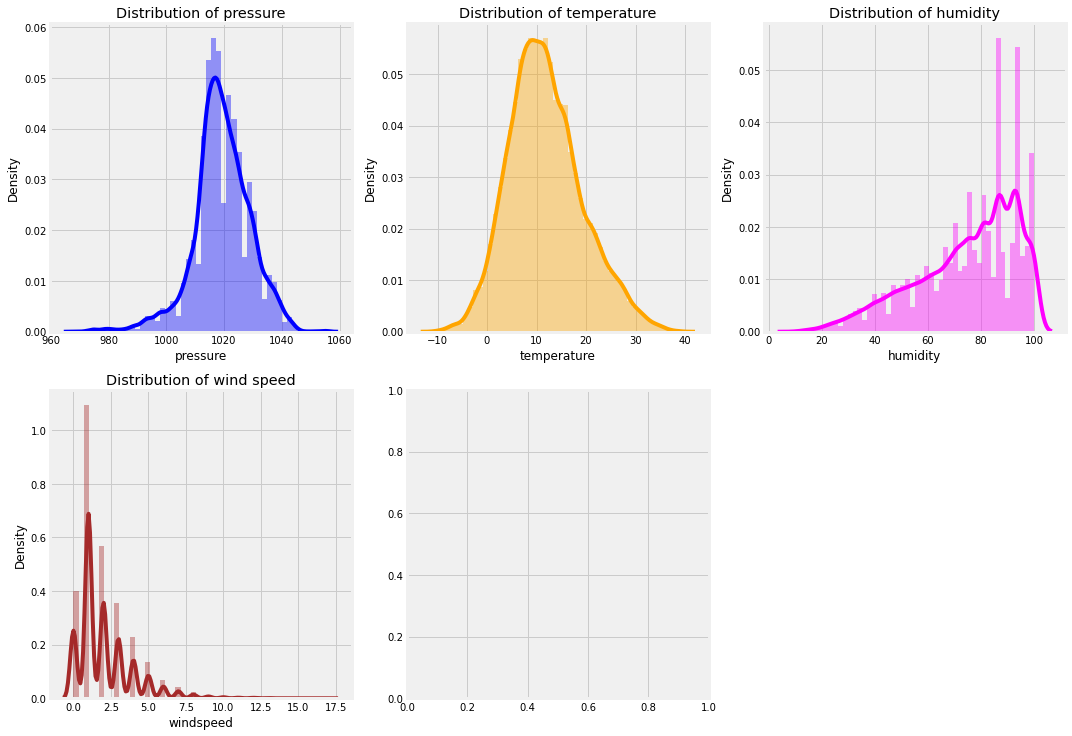

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.distplot(portland['pressure'],color='blue')
plt.title('Distribution of pressure')
plt.subplot(3,3,2)
sns.distplot(portland['temperature'],color='orange')
plt.title('Distribution of temperature')
plt.subplot(3,3,3)
sns.distplot(portland['humidity'],color='magenta')
plt.title('Distribution of humidity')
plt.subplot(3,3,4)
sns.distplot(portland['windspeed'],color='brown')
plt.title('Distribution of wind speed')
plt.subplot(3,3,5)
plt.tight_layout()
plt.show()

In [75]:
time=pd.DatetimeIndex(portland['datetime'])
portland['date']=time.date
portland['year']=time.year
portland['month']=time.month
portland['day']=time.day
portland['time']=time.time

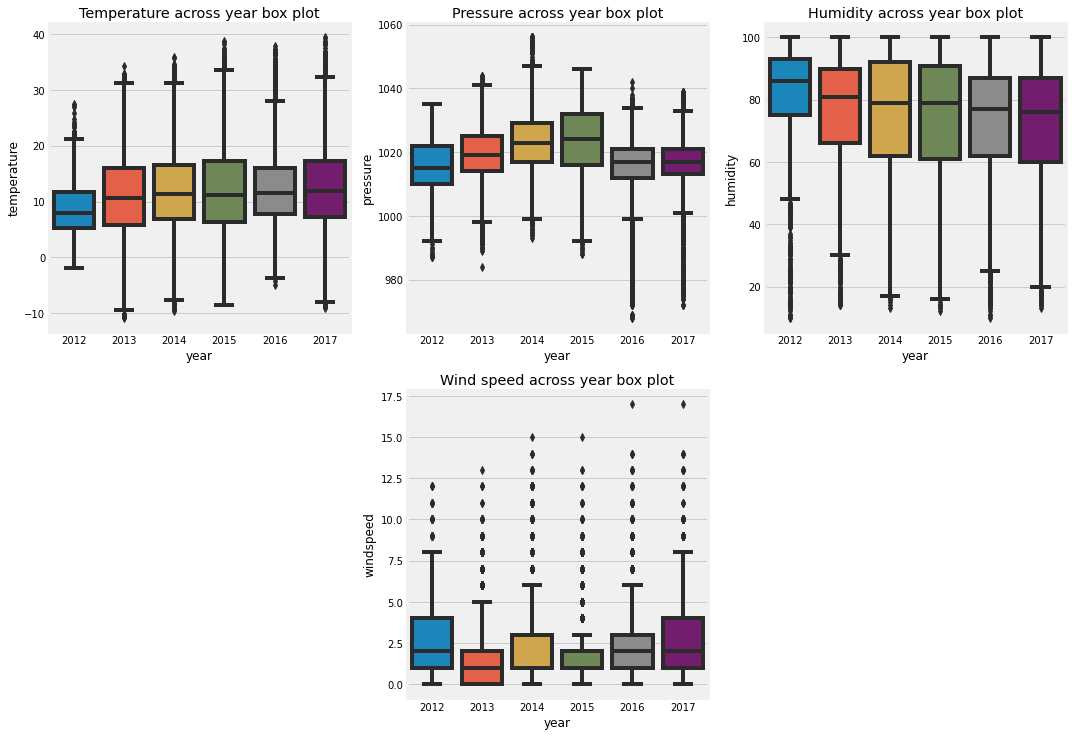

In [77]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='year',y='temperature',data=portland)
plt.title('Temperature across year box plot')
plt.subplot(3,3,2)
sns.boxplot(x='year',y='pressure',data=portland)
plt.title('Pressure across year box plot')
plt.subplot(3,3,3)
sns.boxplot(x='year',y='humidity',data=portland)
plt.title('Humidity across year box plot')
plt.subplot(3,3,5)
sns.boxplot(x='year',y='windspeed',data=portland)
plt.title('Wind speed across year box plot')
plt.tight_layout()
plt.show()

<AxesSubplot:>

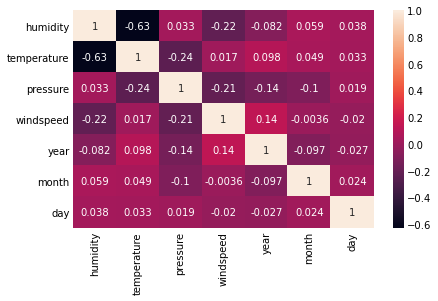

In [81]:
portland.corr()
sns.heatmap(portland.corr(),annot=True)